# ARIMA and Seasonal ARIMA
### Autoregressive Integrated Moving Averages
### The general process for ARIMA models is the following:

#### 1.Visualize the Time Series Data
#### 2.Make the time series data stationary
#### 3.Plot the Correlation and AutoCorrelation Charts
#### 4.Construct the ARIMA Model or Seasonal ARIMA based on the data
#### 5.Use the model to make predictions

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [19]:
fl_data = pd.read_csv("Florida, Florida, United States_concat.csv")

In [20]:
fl_data.dropna(axis=1,inplace=True)

In [21]:
fl_data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,2016,1,1,0,30,23.0,0,0,0,0,...,0,99.50,176.11,0.144,1010,3.409,145.8,2.4,0.0,0.0
1,2016,1,1,1,30,23.0,0,0,0,1,...,0,98.62,164.62,0.144,1010,3.386,149.0,2.2,0.0,0.0
2,2016,1,1,2,30,23.0,0,0,0,8,...,0,97.78,151.28,0.144,1010,3.343,150.9,2.1,0.0,0.0
3,2016,1,1,3,30,23.0,0,0,0,8,...,0,97.02,137.90,0.144,1010,3.304,152.1,2.1,0.0,0.0
4,2016,1,1,4,30,22.0,0,0,0,8,...,0,100.00,124.64,0.144,1010,3.282,155.2,2.1,0.0,0.0


In [22]:
fl_data['Date'] = pd.to_datetime(fl_data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')

In [23]:
fl_data = fl_data[['Date','GHI']]

In [24]:
fl_data.set_index('Date',inplace=True)

In [25]:
fl_data.describe()

,GHI
count,43800.000000
mean,211.825890
std,291.478256
min,0.000000
25%,0.000000
50%,4.000000
75%,413.000000
max,1060.000000


# Visualize the data: 

<AxesSubplot:xlabel='Date'>

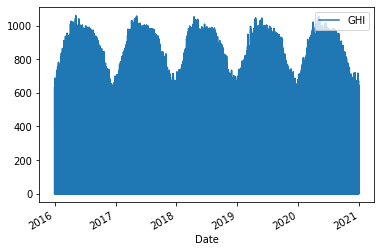

In [26]:
fl_data.plot()

In [27]:
#Resampling generates a unique sampling distribution on the basis of the actual data.
#'M' = month end frequency
fl_data = fl_data.resample('M').mean()

<AxesSubplot:xlabel='Date'>

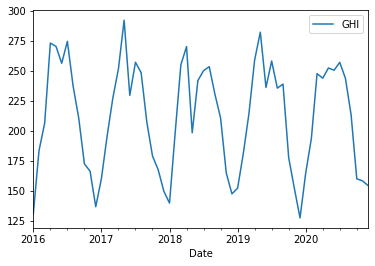

In [28]:
fl_data.plot()

In [29]:
#ADF Test is a common statistical test used to test whether a given Time series is stationary or not . 
#Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [30]:
test_result=adfuller(fl_data)

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(GHI):
    result=adfuller(GHI)
    
#adfuller gives 5 different values.

    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [32]:
adfuller_test(fl_data['GHI'])

ADF Test Statistic : -6.557891837925627
p-value : 8.525291999522815e-09
#Lags Used : 9
Number of Observations Used : 50
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Differencing:

In [33]:
fl_data

,GHI
Date,
2016-01-31,131.090054
2016-02-29,183.508929
2016-03-31,206.518817
2016-04-30,273.225000
2016-05-31,270.418011
2016-06-30,256.377778
2016-07-31,274.641129
2016-08-31,237.724462
2016-09-30,210.743056


In [34]:
fl_data['GHI First Difference'] = fl_data['GHI'] - fl_data['GHI'].shift(1)

In [35]:
fl_data

,GHI,GHI First Difference
Date,,
2016-01-31,131.090054,NaN
2016-02-29,183.508929,52.418875
2016-03-31,206.518817,23.009889
2016-04-30,273.225000,66.706183
2016-05-31,270.418011,-2.806989
2016-06-30,256.377778,-14.040233
2016-07-31,274.641129,18.263351
2016-08-31,237.724462,-36.916667
2016-09-30,210.743056,-26.981407


In [36]:
fl_data['GHI First Difference']

Date
2016-01-31          NaN
2016-02-29    52.418875
2016-03-31    23.009889
2016-04-30    66.706183
2016-05-31    -2.806989
2016-06-30   -14.040233
2016-07-31    18.263351
2016-08-31   -36.916667
2016-09-30   -26.981407
2016-10-31   -38.162410
2016-11-30    -6.130645
2016-12-31   -29.634140
2017-01-31    23.498656
2017-02-28    35.279234
2017-03-31    31.478831
2017-04-30    24.759364
2017-05-31    40.411335
2017-06-30   -62.568280
2017-07-31    27.560215
2017-08-31    -8.716398
2017-09-30   -41.078539
2017-10-31   -28.307213
2017-11-30   -11.431676
2017-12-31   -17.994400
2018-01-31    -9.810484
2018-02-28    58.725518
2018-03-31    56.439804
2018-04-30    15.215950
2018-05-31   -71.807348
2018-06-30    43.535125
2018-07-31     8.201434
2018-08-31     3.342742
2018-09-30   -22.928898
2018-10-31   -19.827823
2018-11-30   -45.794400
2018-12-31   -17.431407
2019-01-31     4.696237
2019-02-28    28.781202
2019-03-31    33.522561
2019-04-30    44.541129
2019-05-31    23.177957
2019-06-30 

In [37]:
fl_data['Seasonal First Difference']=fl_data['GHI']-fl_data['GHI'].shift(12)

In [38]:
fl_data['Seasonal First Difference'].head(20)

Date
2016-01-31          NaN
2016-02-29          NaN
2016-03-31          NaN
2016-04-30          NaN
2016-05-31          NaN
2016-06-30          NaN
2016-07-31          NaN
2016-08-31          NaN
2016-09-30          NaN
2016-10-31          NaN
2016-11-30          NaN
2016-12-31          NaN
2017-01-31    29.224462
2017-02-28    12.084821
2017-03-31    20.553763
2017-04-30   -21.393056
2017-05-31    21.825269
2017-06-30   -26.702778
2017-07-31   -17.405914
2017-08-31    10.794355
Freq: M, Name: Seasonal First Difference, dtype: float64

In [39]:
## Again test dickey fuller test
adfuller_test(fl_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.790947931903275
p-value : 5.65964181423743e-05
#Lags Used : 7
Number of Observations Used : 40
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

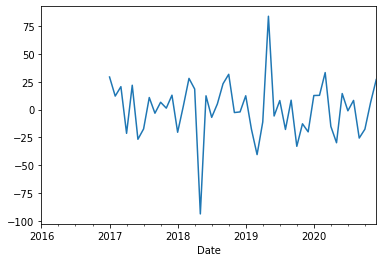

In [40]:
fl_data['Seasonal First Difference'].plot()

# Auto Regressive Model:
  
## yt=c+ϕ1yt−1+ϕ2yt−2+⋯+ϕpyt−p+εt

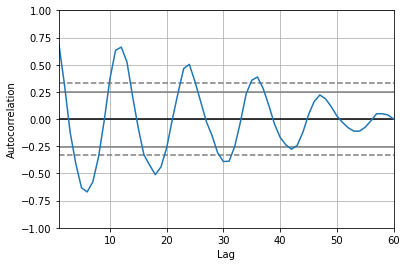

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fl_data['GHI'])
plt.show()

# Autocorrelation and Partial Autocorrelation:
#### Identification of an AR model is often best done with the PACF.
#### Identification of an MA model is often best done with the ACF rather than the PACF.
### p,d,q terms are important for this test
#### p = AR model lags 
#### d = differencing 
#### q = MA lags

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


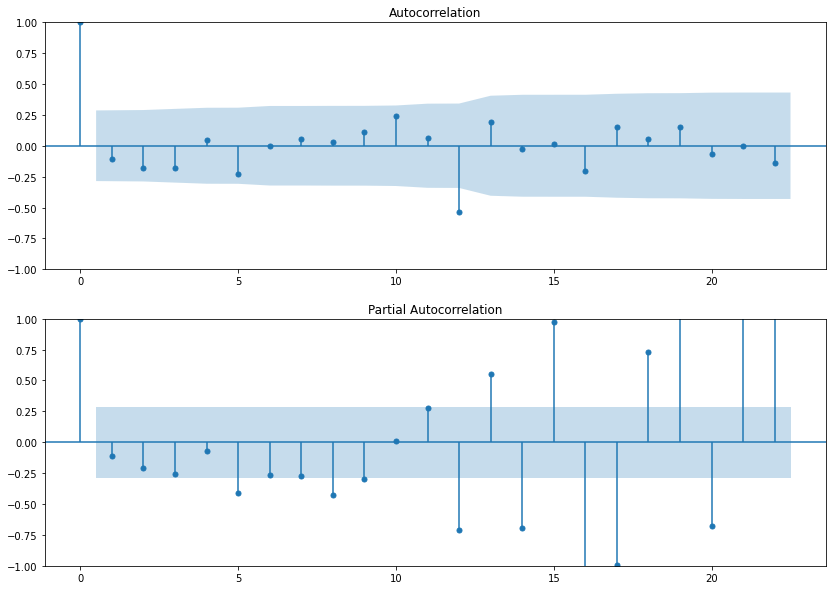

In [73]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(fl_data['Seasonal First Difference'].iloc[13:],lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(fl_data['Seasonal First Difference'].iloc[13:],lags=22,ax=ax2)

In [74]:
model=sm.tsa.statespace.SARIMAX(fl_data['GHI'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:xlabel='Date'>

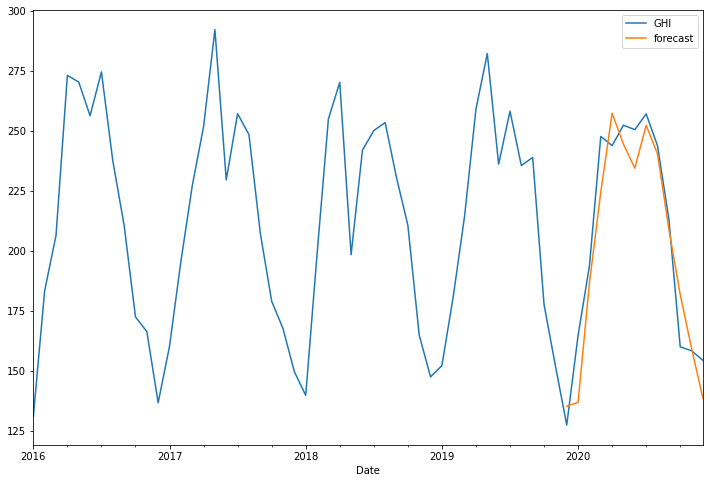

In [83]:
fl_data['forecast']=results.predict(start='2019-12-31',end='2020-12-31',dynamic=True)
fl_data[['GHI','forecast']].plot(figsize=(12,8))

In [84]:
fl_data


,GHI,GHI First Difference,Seasonal First Difference,forecast
Date,,,,
2016-01-31,131.090054,NaN,NaN,NaN
2016-02-29,183.508929,52.418875,NaN,NaN
2016-03-31,206.518817,23.009889,NaN,NaN
2016-04-30,273.225000,66.706183,NaN,NaN
2016-05-31,270.418011,-2.806989,NaN,NaN
2016-06-30,256.377778,-14.040233,NaN,NaN
2016-07-31,274.641129,18.263351,NaN,NaN
2016-08-31,237.724462,-36.916667,NaN,NaN
2016-09-30,210.743056,-26.981407,NaN,NaN


In [145]:
from pandas.tseries.offsets import DateOffset
future_dates=[fl_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [146]:
future_datest_fl_data=pd.DataFrame(index=future_dates[1:],columns=fl_data.columns)

In [147]:
future_datest_fl_data.tail()

,GHI,GHI First Difference,Seasonal First Difference,forecast
2022-07-31,NaN,NaN,NaN,NaN
2022-08-31,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,NaN
2022-11-30,NaN,NaN,NaN,NaN


In [148]:
future_fl_data=pd.concat([fl_data,future_datest_fl_data])

<AxesSubplot:>

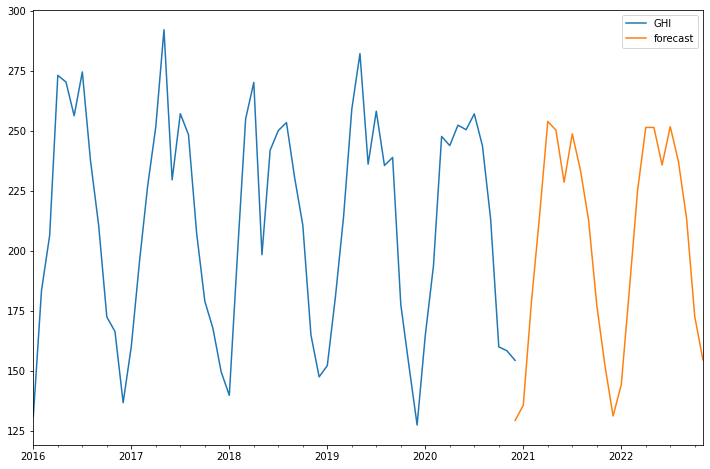

In [149]:
future_fl_data['forecast'] = results.predict(start = '2020-12-31', end = '2022-12-31', dynamic= True)  
future_fl_data[['GHI', 'forecast']].plot(figsize=(12, 8)) 

In [150]:
future_fl_data['forecast'].tail(40)

2019-08-31           NaN
2019-09-30           NaN
2019-10-31           NaN
2019-11-30           NaN
2019-12-31           NaN
2020-01-31           NaN
2020-02-29           NaN
2020-03-31           NaN
2020-04-30           NaN
2020-05-31           NaN
2020-06-30           NaN
2020-07-31           NaN
2020-08-31           NaN
2020-09-30           NaN
2020-10-31           NaN
2020-11-30           NaN
2020-12-31    129.403254
2021-01-31    135.735176
2021-02-28    178.817585
2021-03-31    214.882642
2021-04-30    253.998231
2021-05-31    250.397234
2021-06-30    228.689994
2021-07-31    248.817322
2021-08-31    233.736380
2021-09-30    212.861594
2021-10-31    177.494871
2021-11-30    152.310956
2021-12-31    131.285251
2022-01-31    144.302704
2022-02-28    184.217594
2022-03-31    225.259646
2022-04-30    251.503525
2022-05-31    251.508695
2022-06-30    235.868152
2022-07-31    251.857905
2022-08-31    237.323187
2022-09-30    213.530321
2022-10-31    172.707923
2022-11-30    154.685174
